In [1]:
import pandas as pd
import numpy as np

In [140]:
dataa=pd.read_csv("aug_train.csv")

<IPython.core.display.Javascript object>

In [2]:
df=pd.read_csv('aug_train.csv')

<IPython.core.display.Javascript object>

In [3]:
train=pd.read_csv('aug_train.csv')

<IPython.core.display.Javascript object>

In [4]:
data=pd.read_csv('aug_train.csv')

<IPython.core.display.Javascript object>

In [5]:
train1=pd.read_csv('aug_train.csv')

<IPython.core.display.Javascript object>

In [148]:
dataa.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [ ]:
#target: 0 – Not looking for job change, 1 – Looking for a job change

In [144]:
dataa.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

In [6]:
train1.drop(['enrollee_id','city'],inplace=True,axis=1)
train1=pd.get_dummies(train1,columns=[ 'gender', 'relevent_experience',
       'enrolled_university', 'education_level', 'major_discipline',
       'experience', 'company_size', 'company_type', 'last_new_job'],drop_first=True)
X=train1.drop('target',axis=1)
Y=train1['target']
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
#{'bootstrap': [True, False],
 #'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 #'max_features': ['auto', 'sqrt'],
 #'min_samples_leaf': [1, 2, 4],
 #'min_samples_split': [2, 5, 10],
 #'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, Y_train)
pred=rf_random.predict(X_test)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 14.8min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 30.3min finished


In [7]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
print(confusion_matrix(Y_test,pred))
print(accuracy_score(Y_test,pred))
print(classification_report(Y_test,pred))


[[2590  292]
 [ 566  384]]
0.7760960334029228
              precision    recall  f1-score   support

         0.0       0.82      0.90      0.86      2882
         1.0       0.57      0.40      0.47       950

    accuracy                           0.78      3832
   macro avg       0.69      0.65      0.67      3832
weighted avg       0.76      0.78      0.76      3832



In [145]:
dataa['experience'].value_counts()

>20    3286
5      1430
4      1403
3      1354
6      1216
2      1127
7      1028
10      985
9       980
8       802
15      686
11      664
14      586
1       549
<1      522
16      508
12      494
13      399
17      342
19      304
18      280
20      148
Name: experience, dtype: int64

In [8]:
df.groupby(['experience','target']).count().head()

enrollee_id  city  city_development_index  gender  \
experience target                                                      
1          0.0             316   316                     316     201   
           1.0             233   233                     233     137   
10         0.0             778   778                     778     644   
           1.0             207   207                     207     157   
11         0.0             513   513                     513     431   

                   relevent_experience  enrolled_university  education_level  \
experience target                                                              
1          0.0                     316                  304              293   
           1.0                     233                  226              223   
10         0.0                     778                  763              763   
           1.0                     207                  204              207   
11         0.0                     513                  511              506   

                   major_discipline  company_size  company_type  last_new_job  \
experience target                                                               
1          0.0                  193           162           159           302   
           1.0                  186           106           108           215   
10         0.0                  700           651           629           772   
           1.0                  190           126           127           205   
11         0.0                  465           430           417           510   

                   training_hours  
experience target                  
1          0.0                316  
           1.0                233  
10         0.0                778  
           1.0                207  
11         0.0                513

In [9]:
df[df['experience'].isnull()]['target'].value_counts()

0.0    42
1.0    23
Name: target, dtype: int64

In [142]:
dataa['experience'].value_counts()

>20    3286
5      1430
4      1403
3      1354
6      1216
2      1127
7      1028
10      985
9       980
8       802
15      686
11      664
14      586
1       549
<1      522
16      508
12      494
13      399
17      342
19      304
18      280
20      148
Name: experience, dtype: int64

In [10]:
def convert(x):
    if x in ['<1','1']:
        return "GRP 1"
    elif x in ['2','3','4','5','6','7']:
        return "GRP 2"
    elif x in ['8','9','10','11']:
        return "GRP 3"
    elif x in ['12','13','14']:
        return "GRP 4"
    elif x in ['15','16','17','18','19','20','>20']:
        return "GRP 5"
    else:
        return "GRP 2"

In [11]:
df['experience']=df['experience'].apply(convert)


In [12]:
df['experience'].value_counts()

GRP 2    7623
GRP 5    5554
GRP 3    3431
GRP 4    1479
GRP 1    1071
Name: experience, dtype: int64

In [13]:
df.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                   0
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

In [143]:
dataa['major_discipline'].value_counts()

STEM               14492
Humanities           669
Other                381
Business Degree      327
Arts                 253
No Major             223
Name: major_discipline, dtype: int64

In [146]:
dataa['education_level'].value_counts()

Graduate          11598
Masters            4361
High School        2017
Phd                 414
Primary School      308
Name: education_level, dtype: int64

In [15]:
def fill(x):
    if x[0]=='Primary School' or x[0]=="High School":
        return "No Major"
    else:
        return x[1]

In [16]:
df['major_discipline']=df[['education_level','major_discipline']].apply(fill,axis=1)

In [17]:
df.groupby(['education_level','major_discipline']).count()

enrollee_id   city  city_development_index  \
education_level major_discipline                                               
Graduate        Arts                      208    208                     208   
                Business Degree           238    238                     238   
                Humanities                420    420                     420   
                No Major                  194    194                     194   
                Other                     272    272                     272   
                STEM                    10244  10244                   10244   
High School     No Major                 2017   2017                    2017   
Masters         Arts                       42     42                      42   
                Business Degree            86     86                      86   
                Humanities                225    225                     225   
                No Major                   29     29                      29   
                Other                     100    100                     100   
                STEM                     3873   3873                    3873   
Phd             Arts                        3      3                       3   
                Business Degree             3      3                       3   
                Humanities                 24     24                      24   
                Other                       9      9                       9   
                STEM                      375    375                     375   
Primary School  No Major                  308    308                     308   

                                  gender  relevent_experience  \
education_level major_discipline                                
Graduate        Arts                 169                  208   
                Business Degree      188                  238   
                Humanities           358                  420   
                No Major             159                  194   
                Other                210                  272   
                STEM                7938                10244   
High School     No Major            1495                 2017   
Masters         Arts                  32                   42   
                Business Degree       63                   86   
                Humanities           182                  225   
                No Major              23                   29   
                Other                 73                  100   
                STEM                2946                 3873   
Phd             Arts                   2                    3   
                Business Degree        3                    3   
                Humanities            15                   24   
                Other                  7                    9   
                STEM                 304                  375   
Primary School  No Major             213                  308   

                                  enrolled_university  experience  \
education_level major_discipline                                    
Graduate        Arts                              206         208   
                Business Degree                   236         238   
                Humanities                        415         420   
                No Major                          192         194   
                Other                             269         272   
                STEM                            10088       10244   
High School     No Major                         1970        2017   
Masters         Arts                               42          42   
                Business Degree                    86          86   
                Humanities                        223         225   
                No Major                           27          29   
                Other                              99         100   
                STEM 

In [18]:
def filln(x):
    if x[0]=='Graduate' or x[0]=='Masters':
        return 'STEM'
    else:
        return x[1]
    

In [19]:
df['major_discipline']=df[['education_level','major_discipline']].apply(filln,axis=1)

In [20]:
df.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline           460
experience                   0
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

In [21]:
df.groupby(['enrolled_university','target']).count()

enrollee_id   city  city_development_index  \
enrolled_university target                                               
Full time course    0.0            2326   2326                    2326   
                    1.0            1431   1431                    1431   
Part time course    0.0             896    896                     896   
                    1.0             302    302                     302   
no_enrollment       0.0           10896  10896                   10896   
                    1.0            2921   2921                    2921   

                            gender  relevent_experience  education_level  \
enrolled_university target                                                 
Full time course    0.0       1629                 2326             2282   
                    1.0        947                 1431             1406   
Part time course    0.0        686                  896              882   
                    1.0        193                  302              295   
no_enrollment       0.0       8802                10896            10679   
                    1.0       2180                 2921             2868   

                            major_discipline  experience  company_size  \
enrolled_university target                                               
Full time course    0.0                 2282        2326          1218   
                    1.0                 1406        1431           460   
Part time course    0.0                  882         896           737   
                    1.0                  295         302           146   
no_enrollment       0.0                10679       10896          8799   
                    1.0                 2868        2921          1711   

                            company_type  last_new_job  training_hours  
enrolled_university target                                              
Full time course    0.0             1258          2229            2326  
                    1.0              506          1362            1431  
Part time course    0.0              699           880             896  
                    1.0              150           287             302  
no_enrollment       0.0             8572         10760           10896  
                    1.0             1689          2864            2921

In [22]:
df[df['enrolled_university'].isnull()]['target'].value_counts()

0.0    263
1.0    123
Name: target, dtype: int64

In [23]:
a=df['enrolled_university'].mode()
df['enrolled_university']=df['enrolled_university'].fillna(a[0])

In [24]:
b=df['education_level'].mode()
df['education_level']=df['education_level'].fillna(b[0])

In [25]:
c=df['major_discipline'].mode()
df['major_discipline']=df['major_discipline'].fillna(c[0])

In [26]:
d=df['last_new_job'].mode()
df['last_new_job']=df['last_new_job'].fillna(d[0])

In [27]:
df.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university          0
education_level              0
major_discipline             0
experience                   0
company_size              5938
company_type              6140
last_new_job                 0
training_hours               0
target                       0
dtype: int64

In [28]:
df.drop(['gender','company_size','company_type'],axis=1,inplace=True)

In [29]:
df.drop(['enrollee_id','city'],axis=1,inplace=True)

In [30]:
df.columns

Index(['city_development_index', 'relevent_experience', 'enrolled_university',
       'education_level', 'major_discipline', 'experience', 'last_new_job',
       'training_hours', 'target'],
      dtype='object')

In [31]:
df=pd.get_dummies(df,columns=[ 'relevent_experience', 'enrolled_university',
       'education_level', 'major_discipline', 'experience', 'last_new_job'],drop_first=True)

<IPython.core.display.Javascript object>

In [32]:
df.columns

Index(['city_development_index', 'training_hours', 'target',
       'relevent_experience_No relevent experience',
       'enrolled_university_Part time course',
       'enrolled_university_no_enrollment', 'education_level_High School',
       'education_level_Masters', 'education_level_Phd',
       'education_level_Primary School', 'major_discipline_Business Degree',
       'major_discipline_Humanities', 'major_discipline_No Major',
       'major_discipline_Other', 'major_discipline_STEM', 'experience_GRP 2',
       'experience_GRP 3', 'experience_GRP 4', 'experience_GRP 5',
       'last_new_job_2', 'last_new_job_3', 'last_new_job_4', 'last_new_job_>4',
       'last_new_job_never'],
      dtype='object')

In [33]:
X1=df.drop('target',axis=1)
Y1=df['target']

In [34]:
from sklearn.ensemble import ExtraTreesClassifier
model=ExtraTreesClassifier()
model.fit(X1,Y1)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
                     max_depth=None, max_features='auto', max_leaf_nodes=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
                     oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [35]:
print(model.feature_importances_)

[3.33371941e-01 5.20912358e-01 2.02580738e-02 8.90612217e-03
 1.81249700e-02 2.48915171e-03 1.07213641e-02 2.68192838e-03
 1.35692575e-03 1.40722157e-05 3.69605972e-04 4.36521523e-03
 1.28353984e-04 2.09559791e-03 1.13083129e-02 7.84336661e-03
 5.87177590e-03 1.23856751e-02 7.21010954e-03 5.96634377e-03
 6.13469058e-03 7.41346616e-03 1.00705785e-02]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

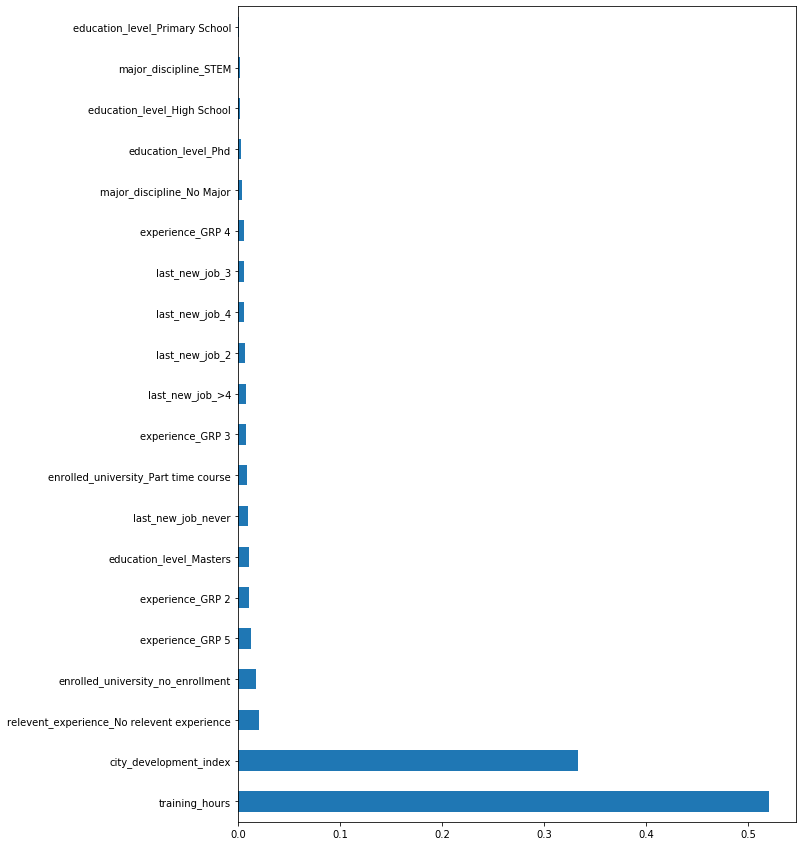

In [147]:
plt.figure(figsize=(10,15))
feat_importances=pd.Series(model.feature_importances_,index=X1.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()


In [37]:
X1_train,X1_test,Y1_train,Y1_test=train_test_split(X1,Y1,test_size=0.2,random_state=0) 

<IPython.core.display.Javascript object>

In [38]:
   
from pprint import pprint
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)
#{'bootstrap': [True, False],
 #'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 #'max_features': ['auto', 'sqrt'],
 #'min_samples_leaf': [1, 2, 4],
 #'min_samples_split': [2, 5, 10],
 #'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random1 = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random1.fit(X1_train, Y1_train)
pred1=rf_random1.predict(X1_test)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}
Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 11.5min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 22.4min finished


In [39]:
from sklearn.metrics import confusion_matrix,accuracy_score


In [40]:
print(classification_report(Y1_test,pred1))

              precision    recall  f1-score   support

         0.0       0.81      0.92      0.86      2882
         1.0       0.59      0.35      0.44       950

    accuracy                           0.78      3832
   macro avg       0.70      0.64      0.65      3832
weighted avg       0.76      0.78      0.76      3832



In [41]:
confusion_matrix(Y1_test,pred1)

array([[2653,  229],
       [ 614,  336]], dtype=int64)

In [42]:
accuracy_score(Y1_test,pred1)

0.7800104384133612

In [43]:
from sklearn.linear_model import LogisticRegression

In [44]:
model2=LogisticRegression()
model2.fit(X1_train,Y1_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [45]:
pred2=model2.predict(X1_test)

In [46]:
print(classification_report(Y1_test,pred2))

              precision    recall  f1-score   support

         0.0       0.79      0.94      0.86      2882
         1.0       0.56      0.23      0.33       950

    accuracy                           0.76      3832
   macro avg       0.67      0.59      0.59      3832
weighted avg       0.73      0.76      0.73      3832



In [47]:
confusion_matrix(Y1_test,pred2)

array([[2710,  172],
       [ 730,  220]], dtype=int64)

In [48]:
accuracy_score(Y1_test,pred2)

0.7646137787056367

In [49]:
a=data['experience'].mode()

In [50]:
a

0    >20
dtype: object

In [51]:
data['experience']=data['experience'].fillna(a[0])

In [52]:
data['experience'].value_counts()

>20    3351
5      1430
4      1403
3      1354
6      1216
2      1127
7      1028
10      985
9       980
8       802
15      686
11      664
14      586
1       549
<1      522
16      508
12      494
13      399
17      342
19      304
18      280
20      148
Name: experience, dtype: int64

In [53]:
def convertd(x):
    if x =='<1':
        return 0
    elif x=='>20':
        return 21
    else:
        return int(x)

In [54]:
data['experience']=data['experience'].apply(convertd)

In [55]:
data['major_discipline']=data[['education_level','major_discipline']].apply(fill,axis=1)
data['major_discipline']=data[['education_level','major_discipline']].apply(filln,axis=1)

In [56]:
a1=data['enrolled_university'].mode()
data['enrolled_university']=data['enrolled_university'].fillna(a1[0])

In [57]:
b1=data['education_level'].mode()
data['education_level']=data['education_level'].fillna(b1[0])

In [58]:
c1=data['major_discipline'].mode()
data['major_discipline']=data['major_discipline'].fillna(c1[0])

In [59]:
d1=data['last_new_job'].mode()
data['last_new_job']=data['last_new_job'].fillna(d1[0])

In [60]:
data1=data.copy()
data2=data.copy()


In [61]:
data3=data1.copy()

In [62]:
e1=data['gender'].mode()
data['gender']=data['gender'].fillna(e1[0])

In [63]:
e1=data3['gender'].mode()
data3['gender']=data3['gender'].fillna(e1[0])

In [64]:
f1=data['company_size'].mode()
data['company_size']=data['company_size'].fillna(f1[0])

In [65]:
f1=data3['company_size'].mode()
data3['company_size']=data3['company_size'].fillna(f1[0])

In [66]:
g1=data['company_type'].mode()
data['company_type']=data['company_type'].fillna(g1[0])

In [67]:
g1=data3['company_type'].mode()
data3['company_type']=data3['company_type'].fillna(g1[0])

In [68]:
data.columns

Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours', 'target'],
      dtype='object')

In [69]:
data.drop(['enrollee_id','city'],axis=1,inplace=True)

In [70]:
data=pd.get_dummies(data,columns=[ 'relevent_experience','gender','company_size','company_type','enrolled_university',
       'education_level', 'major_discipline', 'last_new_job'],drop_first=True)

<IPython.core.display.Javascript object>

In [71]:
X2=data.drop('target',axis=1)
Y2=data['target']
X2_train,X2_test,Y2_train,Y2_test=train_test_split(X2,Y2,test_size=0.2,random_state=0)
model3=LogisticRegression()
model3.fit(X2_train,Y2_train)



<IPython.core.display.Javascript object>

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [72]:
pred3=model3.predict(X2_test)

In [73]:
print(confusion_matrix(Y2_test,pred3))

[[2695  187]
 [ 707  243]]


In [74]:
print(accuracy_score(Y2_test,pred3))
print(classification_report(Y2_test,pred3))

0.7667014613778705
              precision    recall  f1-score   support

         0.0       0.79      0.94      0.86      2882
         1.0       0.57      0.26      0.35       950

    accuracy                           0.77      3832
   macro avg       0.68      0.60      0.60      3832
weighted avg       0.74      0.77      0.73      3832



In [75]:
   
from pprint import pprint
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)
#{'bootstrap': [True, False],
 #'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 #'max_features': ['auto', 'sqrt'],
 #'min_samples_leaf': [1, 2, 4],
 #'min_samples_split': [2, 5, 10],
 #'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random2 = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random2.fit(X2_train, Y2_train)
pred2=rf_random2.predict(X2_test)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}
Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 11.7min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 23.5min finished


In [76]:
print(classification_report(Y2_test,pred2))

              precision    recall  f1-score   support

         0.0       0.81      0.90      0.85      2882
         1.0       0.55      0.35      0.43       950

    accuracy                           0.77      3832
   macro avg       0.68      0.63      0.64      3832
weighted avg       0.74      0.77      0.75      3832



In [77]:
print(accuracy_score(Y2_test,pred2))

0.7669624217118998


In [78]:
confusion_matrix(Y2_test,pred2)

array([[2607,  275],
       [ 618,  332]], dtype=int64)

In [79]:
data3.drop(['enrollee_id','city'],axis=1,inplace=True)

In [80]:
def major(x):
    if x=='STEM':
        return 1
    elif x=='Humanities':
        return 2
    elif x=='Other':
        return 3
    elif x=='Business Degree':
        return 4
    elif x=='Arts':
        return 5
    elif x=='No Major':
        return 6
    else:
        return x
    

In [81]:
data3['major_discipline']=data3['major_discipline'].apply(major)

In [82]:
def gen(x):
    if x=='Male':
        return 2
    elif x=='Female':
        return 2
    else:
        return 3

In [83]:
data3['gender']=data3['gender'].apply(gen)

In [84]:
def rel(x):
    if x=='Has relevent experience':
        return 1
    else:
        return 0

In [85]:
data3['relevent_experience']=data3['relevent_experience'].apply(rel)

In [86]:
def enr(x):
    if x=='no_enrollment':
        return 1
    elif x=='Full time course':
        return 2
    else:
        return 3

In [87]:
data3['enrolled_university']=data3['enrolled_university'].apply(enr)

In [88]:
def edu(x):
    if x=='Graduate':
        return 1
    elif x=="Masters":
        return 2
    elif x=='Primary School':
        return 3
    elif x=='High School':
        return 4
    else:
        return 5

In [89]:
data3['education_level']=data3['education_level'].apply(edu)

In [90]:
def siz(x):
    if x=='<10':
        return 1
    elif x=='10/49':
        return 2
    elif x=='50-99':
        return 3
    elif x=='100-500':
        return 4
    elif x=='500-999':
        return 5
    elif x=='1000-4999':
        return 6
    elif x=='5000-9999':
        return 7
    else:
        return 8

In [91]:
data3['company_size']=data3['company_size'].apply(siz)

In [92]:
def typ(x):
    if x=='Pvt Ltd':
        return 1
    elif x=='Funded Startup':
        return 2
    elif x=='Public Sector':
        return 3
    elif x=='Early Stage Startup':
        return 4
    elif x=='NGO':
        return 5
    elif x=='Other':
        return 6

In [93]:
data3['company_type']=data3['company_type'].apply(typ)

In [94]:
def las(x):
    if x=='never':
        return 0
    elif x=='1':
        return 1
    elif x=='2':
        return 2
    elif x=='3':
        return 3
    elif x=='4':
        return 4
    else:
        return 5
    

In [95]:
data3['last_new_job']=data3['last_new_job'].apply(las)

In [96]:
data3.corr()

,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
city_development_index,1.000000,0.030444,0.059808,-0.124848,0.065014,0.022104,0.329124,0.087877,0.028376,0.191410,0.001920,-0.341665
gender,0.030444,1.000000,-0.035689,0.020322,0.013513,0.026202,-0.012850,-0.001977,-0.007365,-0.011959,-0.002503,0.002884
relevent_experience,0.059808,-0.035689,1.000000,-0.268229,-0.221786,-0.294813,0.337552,0.104001,0.019297,0.247496,0.011566,-0.128430
enrolled_university,-0.124848,0.020322,-0.268229,1.000000,0.065343,0.137199,-0.278922,-0.075189,0.026888,-0.177682,0.003187,0.103148
education_level,0.065014,0.013513,-0.221786,0.065343,1.000000,0.771198,-0.039747,-0.039271,0.013585,-0.079792,0.001063,-0.082435
major_discipline,0.022104,0.026202,-0.294813,0.137199,0.771198,1.000000,-0.205043,-0.110435,-0.053626,-0.183911,0.005216,-0.053866
experience,0.329124,-0.012850,0.337552,-0.278922,-0.039747,-0.205043,1.000000,0.130320,-0.008201,0.474052,0.001479,-0.174256
company_size,0.087877,-0.001977,0.104001,-0.075189,-0.039271,-0.110435,0.130320,1.000000,-0.048096,0.141026,-0.010114,-0.080316
company_type,0.028376,-0.007365,0.019297,0.026888,0.013585,-0.053626,-0.008201,-0.048096,1.000000,0.004013,0.008910,-0.040059
last_new_job,0.191410,-0.011959,0.247496,-0.177682,-0.079792,-0.183911,0.474052,0.141026,0.004013,1.000000,-0.004949,-0.084607


In [97]:
X4=data3.drop('target',axis=1)
Y4=data3['target']
X4_train,X4_test,Y4_train,Y4_test=train_test_split(X4,Y4,test_size=0.2,random_state=0)
model4=LogisticRegression()
model4.fit(X4_train,Y4_train)
pred4=model4.predict(X4_test)

<IPython.core.display.Javascript object>

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [98]:
print(classification_report(Y4_test,pred4))

              precision    recall  f1-score   support

         0.0       0.78      0.94      0.86      2882
         1.0       0.55      0.22      0.31       950

    accuracy                           0.76      3832
   macro avg       0.67      0.58      0.58      3832
weighted avg       0.73      0.76      0.72      3832



In [99]:
accuracy_score(Y4_test,pred4)

0.7620041753653445

In [100]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='rbf')
svclassifier.fit(X1_train, Y1_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [101]:
pred_SVM= svclassifier.predict(X1_test)

In [102]:
print(classification_report(Y1_test,pred_SVM))

              precision    recall  f1-score   support

         0.0       0.75      1.00      0.86      2882
         1.0       0.00      0.00      0.00       950

    accuracy                           0.75      3832
   macro avg       0.38      0.50      0.43      3832
weighted avg       0.57      0.75      0.65      3832



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [103]:
accuracy_score(Y1_test,pred_SVM)

0.7520876826722338

In [104]:
test=pd.read_csv('aug_test.csv')

<IPython.core.display.Javascript object>

In [105]:
test.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,32403,city_41,0.827,Male,Has relevent experience,Full time course,Graduate,STEM,9,<10,NaN,1,21
1,9858,city_103,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,5,NaN,Pvt Ltd,1,98
2,31806,city_21,0.624,Male,No relevent experience,no_enrollment,High School,NaN,<1,NaN,Pvt Ltd,never,15
3,27385,city_13,0.827,Male,Has relevent experience,no_enrollment,Masters,STEM,11,10/49,Pvt Ltd,1,39
4,27724,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,10000+,Pvt Ltd,>4,72


In [106]:
test.drop(['enrollee_id','city'],axis=1,inplace=True)

In [107]:
test.isnull().sum()

city_development_index      0
gender                    508
relevent_experience         0
enrolled_university        31
education_level            52
major_discipline          312
experience                  5
company_size              622
company_type              634
last_new_job               40
training_hours              0
dtype: int64

In [108]:
test['experience']=test['experience'].apply(convert)


In [111]:
test.head()

,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,0.827,Male,Has relevent experience,Full time course,Graduate,STEM,GRP 3,<10,NaN,1,21
1,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,GRP 2,NaN,Pvt Ltd,1,98
2,0.624,Male,No relevent experience,no_enrollment,High School,NaN,GRP 1,NaN,Pvt Ltd,never,15
3,0.827,Male,Has relevent experience,no_enrollment,Masters,STEM,GRP 3,10/49,Pvt Ltd,1,39
4,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,GRP 5,10000+,Pvt Ltd,>4,72


In [112]:
test['major_discipline']=test[['education_level','major_discipline']].apply(fill,axis=1)
test['major_discipline']=test[['education_level','major_discipline']].apply(filln,axis=1)

In [113]:
a3=test['enrolled_university'].mode()
test['enrolled_university']=test['enrolled_university'].fillna(a3[0])

In [114]:
b3=test['education_level'].mode()
test['education_level']=test['education_level'].fillna(b3[0])

In [115]:
c3=test['major_discipline'].mode()
test['major_discipline']=test['major_discipline'].fillna(c3[0])

In [116]:
d3=test['last_new_job'].mode()
test['last_new_job']=test['last_new_job'].fillna(d3[0])

In [117]:
test.drop(['gender','company_size','company_type'],axis=1,inplace=True)

In [119]:
test=pd.get_dummies(test,columns=[ 'relevent_experience', 'enrolled_university',
       'education_level', 'major_discipline', 'experience', 'last_new_job'],drop_first=True)

<IPython.core.display.Javascript object>

In [124]:
test['major_discipline_Other']=0

In [125]:
test.columns

Index(['city_development_index', 'training_hours',
       'relevent_experience_No relevent experience',
       'enrolled_university_Part time course',
       'enrolled_university_no_enrollment', 'education_level_High School',
       'education_level_Masters', 'education_level_Phd',
       'education_level_Primary School', 'major_discipline_Business Degree',
       'major_discipline_Humanities', 'major_discipline_No Major',
       'major_discipline_STEM', 'experience_GRP 2', 'experience_GRP 3',
       'experience_GRP 4', 'experience_GRP 5', 'last_new_job_2',
       'last_new_job_3', 'last_new_job_4', 'last_new_job_>4',
       'last_new_job_never', 'major_discipline_Other'],
      dtype='object')

In [ ]:
Index(['city_development_index', 'training_hours', 'target',
       'relevent_experience_No relevent experience',
       'enrolled_university_Part time course',
       'enrolled_university_no_enrollment', 'education_level_High School',
       'education_level_Masters', 'education_level_Phd',
       'education_level_Primary School', 'major_discipline_Business Degree',
       'major_discipline_Humanities', 'major_discipline_No Major',
       'major_discipline_Other', 'major_discipline_STEM', 'experience_GRP 2',
       'experience_GRP 3', 'experience_GRP 4', 'experience_GRP 5',
       'last_new_job_2', 'last_new_job_3', 'last_new_job_4', 'last_new_job_>4',
       'last_new_job_never'],

In [126]:
A=rf_random1.predict(test)

In [129]:
predictions=pd.read_csv('aug_test.csv')

<IPython.core.display.Javascript object>

In [131]:
predictions.columns

Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours'],
      dtype='object')

In [132]:
predictions.drop([ 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours'],axis=1)

,enrollee_id
0,32403
1,9858
2,31806
3,27385
4,27724
5,217
6,21465
7,27302
8,12994
9,16287


In [133]:
predictions['target']=A

In [135]:
predictions['target'].value_counts()

0.0    1829
1.0     300
Name: target, dtype: int64

In [136]:
predictions.to_csv('submission.csv',index=False)

In [137]:
dataa=pd.read_csv('aug_train.csv')

<IPython.core.display.Javascript object>

In [138]:
dataa.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64